In [110]:
import pandas as pd 
import numpy as np 
import scanpy as sc
import matplotlib.pyplot as plt
from adjustText import adjust_text
import concurrent.futures
import pickle
import warnings
from datetime import date
import hisepy
import os
import shutil
import milopy   
import milopy.core as milo
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings("ignore")
sc._settings.settings._vector_friendly=True
sc.settings.n_jobs = 60
print("Current working directory:", os.getcwd())

Current working directory: /home/jupyter/BRI_Figures_Final_V2/Figure1


In [123]:
def plot_nhood_graph(adata,alpha: float = 0.1,min_logFC: float = 0,cmap='RdBu_r',min_size: int = 10,plot_edges: bool = False,title: str = "DA log-Fold Change"):
    nhood_adata = adata.uns["nhood_adata"].copy()

    if "Nhood_size" not in nhood_adata.obs.columns:
        raise KeyError(
            'Cannot find "Nhood_size" column in adata.uns["nhood_adata"].obs -- \
                please run milopy.utils.build_nhood_graph(adata)'
        )

    nhood_adata.obs["graph_color"] = nhood_adata.obs["logFC"]
    nhood_adata.obs.loc[nhood_adata.obs["SpatialFDR"]
                        > alpha, "graph_color"] = np.nan
    nhood_adata.obs["abs_logFC"] = abs(nhood_adata.obs["logFC"])
    nhood_adata.obs.loc[nhood_adata.obs["abs_logFC"]
                        < min_logFC, "graph_color"] = np.nan

    # Plotting order - extreme logFC on top
    nhood_adata.obs.loc[nhood_adata.obs["graph_color"].isna(),
                        "abs_logFC"] = np.nan
    ordered = nhood_adata.obs.sort_values(
        'abs_logFC', na_position='first').index
    nhood_adata = nhood_adata[ordered]

    vmax = np.max([nhood_adata.obs["graph_color"].max(),
                  abs(nhood_adata.obs["graph_color"].min())])
    vmin = - vmax

    fig=sc.pl.embedding(nhood_adata, "X_milo_graph",
                    color="graph_color", 
                        cmap=cmap,
                    size=adata.uns["nhood_adata"].obs["Nhood_size"]*min_size,
                    edges=plot_edges, neighbors_key="nhood",na_color='lightGray',edges_color='lightGray',
                    sort_order=False,
                    frameon=False,show=False,
                    vmax=vmax, vmin=vmin,return_fig=True,
                    title=title)
    
    return(fig)
    

In [2]:
adata=sc.read_h5ad("reference/AIFI_Ref_reprocessed_milo.h5ad")

# Age Group

In [3]:
adata.obs['cohort_UP1'] = adata.obs['cohort.cohortGuid'] == "UP1"
adata.obs['cohort_BR1'] = adata.obs['cohort.cohortGuid'] == "BR1"
adata.obs['cohort_BR2'] = adata.obs['cohort.cohortGuid'] == "BR2"

In [151]:
%%time
milo.DA_nhoods(adata, design="~cohort_UP1")
milopy.utils.build_nhood_graph(adata)

CPU times: user 2min 24s, sys: 1min 45s, total: 4min 10s
Wall time: 1min 14s


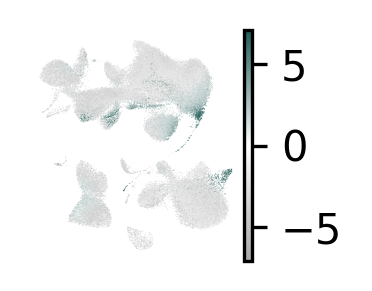

In [152]:
with plt.rc_context({"figure.figsize": (1, 1), "figure.dpi": 300, "figure.frameon": False}):
    colors = ["darkgray",  'white', "#205B56"]
    cmap = LinearSegmentedColormap.from_list("name", colors)
    fig=plot_nhood_graph(adata, alpha=0.1, min_size=0.001, cmap=cmap, title='')  
    fig = plt.gcf()
    fig.savefig("FigureC-1.pdf", bbox_inches='tight')

In [153]:
%%time
milo.DA_nhoods(adata, design="~cohort_BR1")
milopy.utils.build_nhood_graph(adata)

CPU times: user 2min 21s, sys: 1min 41s, total: 4min 2s
Wall time: 1min 13s


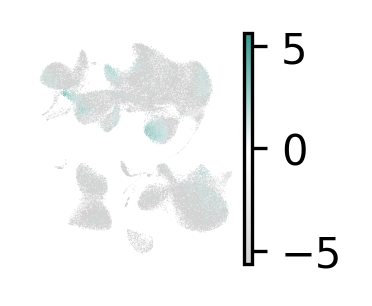

In [154]:
with plt.rc_context({"figure.figsize": (1, 1), "figure.dpi": 300, "figure.frameon": False}):
    colors = ["lightgray",  'white', "#35978F"]
    cmap = LinearSegmentedColormap.from_list("name", colors)
    fig=plot_nhood_graph(adata, alpha=0.1, min_size=0.001, cmap=cmap, title='')  
    fig = plt.gcf()
    fig.savefig("FigureC-2.pdf", bbox_inches='tight')

In [155]:
%%time
milo.DA_nhoods(adata, design="~cohort_BR2")
milopy.utils.build_nhood_graph(adata)

CPU times: user 2min 22s, sys: 1min 41s, total: 4min 4s
Wall time: 1min 13s


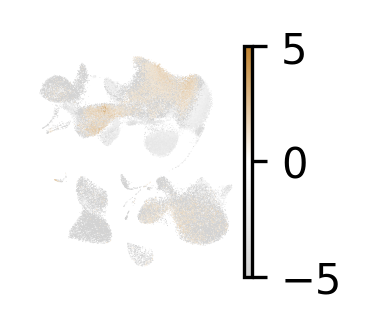

In [156]:
with plt.rc_context({"figure.figsize": (1, 1), "figure.dpi": 300, "figure.frameon": False}):
    colors = ["lightgray",  'white', "#BF812D"]
    cmap = LinearSegmentedColormap.from_list("name", colors)
    fig=plot_nhood_graph(adata, alpha=0.1, min_size=0.001, cmap=cmap, title='')  
    fig = plt.gcf()
    fig.savefig("FigureC-3.pdf", bbox_inches='tight')

# CMV

In [139]:
adata

AnnData object with n_obs × n_vars = 1821725 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id', 'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid', 'subject.biologicalSex', 'subject.race', 'subject.ethnicity', 'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'file.id', 'subject.cmv', 'subject.bmi', 'celltypist.low', 'seurat.l1', 'seurat.l1.score', 'seurat.l2', 'seurat.l2.score', 'seurat.l2.5', 'seurat.l2.5.score', 'seurat.l3', 'seurat.l3.score', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3', 

In [140]:
%%time
milo.DA_nhoods(adata, design="~subject.cmv")
milopy.utils.build_nhood_graph(adata)

CPU times: user 2min 23s, sys: 1min 42s, total: 4min 5s
Wall time: 1min 15s


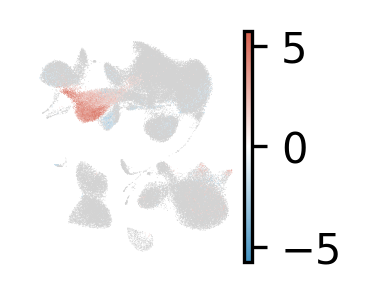

In [150]:
with plt.rc_context({"figure.figsize": (1, 1), "figure.dpi": 300, "figure.frameon": False}):
    colors = ["#4393c3",  'white', "#d6604d"]
    cmap = LinearSegmentedColormap.from_list("name", colors)
    fig=plot_nhood_graph(adata, alpha=0.05, min_size=0.001, cmap=cmap, title='')  
    fig = plt.gcf()
    fig.savefig("FigureC-4.pdf", bbox_inches='tight')

# Sex

In [157]:
%%time
milo.DA_nhoods(adata, design="~subject.biologicalSex")
milopy.utils.build_nhood_graph(adata)

CPU times: user 2min 22s, sys: 1min 39s, total: 4min 2s
Wall time: 1min 12s


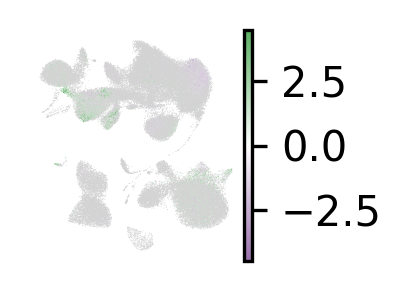

In [159]:
with plt.rc_context({"figure.figsize": (1, 1), "figure.dpi": 300, "figure.frameon": False}):
    colors = ["#9970ab",  'white', "#5aae61"]
    cmap = LinearSegmentedColormap.from_list("name", colors)
    fig=plot_nhood_graph(adata, alpha=0.05, min_size=0.001, cmap=cmap, title='')  
    fig = plt.gcf()
    fig.savefig("FigureC-5.pdf", bbox_inches='tight')